# **1. SET UP AND LOAD DATA**

**1.1 Install Dependencies and Set Up**

In [2]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


'c:\Users\akash' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!pip list

Package                 Version


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip



----------------------- -----------
asttokens               2.4.1
colorama                0.4.6
comm                    0.2.2
debugpy                 1.8.1
decorator               5.1.1
dm-tree                 0.1.8
executing               2.0.1
flatbuffers             24.3.7
ipykernel               6.29.4
ipython                 8.25.0
jedi                    0.19.1
jupyter_client          8.6.2
jupyter_core            5.7.2
libclang                18.1.1
matplotlib-inline       0.1.7
namex                   0.0.7
nest-asyncio            1.6.0
numpy                   2.0.0
packaging               24.1
parso                   0.8.4
pip                     24.0
platformdirs            4.2.2
prompt_toolkit          3.0.47
psutil                  5.9.8
pure-eval               0.2.2
Pygments                2.17.2
pyparsing               3.1.2
python-dateutil         2.9.0.post0
pywin32                 306
pyzmq                   26.0.3
setuptools              69.2.0
six                   

In [4]:
import tensorflow as tf
import os

In [5]:
os.path.join('data','happy')

'data\\happy'

In [6]:
os.listdir('data')

['happy', 'sad']

**1.2 Removing Dodgy Images**

In [7]:
import cv2
import imghdr

In [8]:
data_dir='data'

In [9]:
image_exts=['jpeg','jpg','bmp','png']

In [10]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print("Image not in image_exts list {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with the Image {}".format(image_path))

**1.3 Load Data**

In [11]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 327 files belonging to 2 classes.


In [14]:
#get another batch from iterator
data_iterator=data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [17]:
len(batch)

2

In [18]:
#Class 1 = SAD People
#Class 0 = HAPPY People
batch[1]

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

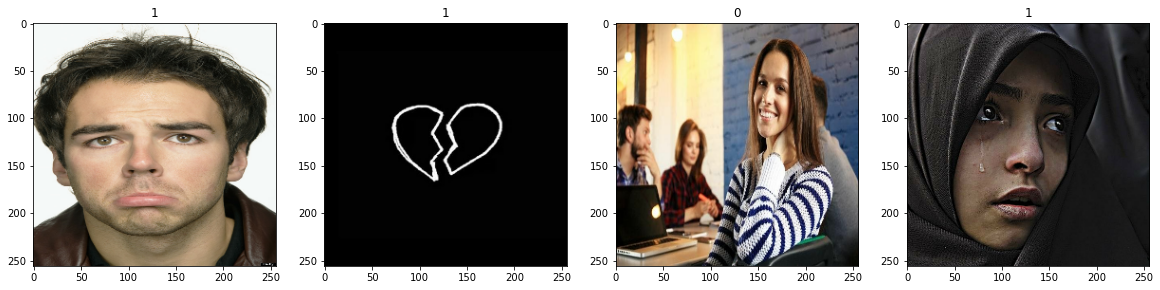

In [19]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [20]:
scaled=batch[0]/255
print(scaled.min())
print(scaled.max())

0.0
1.0


# **2. Preproccess Data**

**2.1 Scale Data**

In [21]:
data = data.map(lambda x, y: (x/255, y))

In [22]:
scaled_iterator = data.as_numpy_iterator().next()

In [23]:
scaled_iterator[0].min()

0.0

**2.2 Split Data**

In [24]:
len(data)

11

In [25]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [26]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

# **3. Deep Learning Model**

**3.1 Build Deep Learning Model**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [28]:
model=Sequential()

In [29]:
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

**3.2 Train Data**

In [32]:
logdir='logs'

In [33]:
tensorboard_callbacks=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist=model.fit(train,epochs=24,validation_data=val,callbacks=[tensorboard_callbacks])

Epoch 1/24
7/7 [==============================] - 34s 4s/step - loss: 1.1122 - accuracy: 0.4598 - val_loss: 0.6929 - val_accuracy: 0.5156
Epoch 2/24
7/7 [==============================] - 22s 3s/step - loss: 0.6977 - accuracy: 0.5045 - val_loss: 0.6809 - val_accuracy: 0.5781
Epoch 3/24
7/7 [==============================] - 20s 2s/step - loss: 0.6786 - accuracy: 0.6027 - val_loss: 0.6659 - val_accuracy: 0.5312
Epoch 4/24
7/7 [==============================] - 20s 2s/step - loss: 0.6327 - accuracy: 0.6116 - val_loss: 0.6779 - val_accuracy: 0.5156
Epoch 5/24
7/7 [==============================] - 24s 3s/step - loss: 0.6509 - accuracy: 0.6295 - val_loss: 0.5849 - val_accuracy: 0.6562
Epoch 6/24
7/7 [==============================] - 24s 3s/step - loss: 0.5738 - accuracy: 0.6429 - val_loss: 0.5531 - val_accuracy: 0.8438
Epoch 7/24
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_past

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python312\\Scripts\\f2py.exe' -> 'C:\\Python312\\Scripts\\f2py.exe.deleteme'


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


7/7 [==============================] - 22s 3s/step - loss: 0.5319 - accuracy: 0.8482 - val_loss: 0.5086 - val_accuracy: 0.7188
Epoch 8/24
7/7 [==============================] - 18s 2s/step - loss: 0.5584 - accuracy: 0.7232 - val_loss: 0.4874 - val_accuracy: 0.8438
Epoch 9/24
7/7 [==============================] - 20s 2s/step - loss: 0.4922 - accuracy: 0.8527 - val_loss: 0.4380 - val_accuracy: 0.8281
Epoch 10/24
7/7 [==============================] - 20s 3s/step - loss: 0.4276 - accuracy: 0.8214 - val_loss: 0.3299 - val_accuracy: 0.8906
Epoch 11/24
7/7 [==============================] - 18s 2s/step - loss: 0.2803 - accuracy: 0.9062 - val_loss: 0.2804 - val_accuracy: 0.8906
Epoch 12/24
7/7 [==============================] - 18s 2s/step - loss: 0.2623 - accuracy: 0.9062 - val_loss: 0.2700 - val_accuracy: 0.8750
Epoch 13/24
7/7 [==============================] - 18s 2s/step - loss: 0.1702 - accuracy: 0.9420 - val_loss: 0.1759 - val_accuracy: 0.9531
Epoch 14/24
7/7 [========================

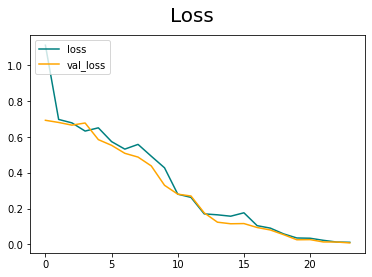

In [35]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

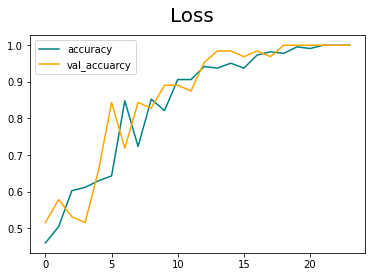

In [36]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuarcy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **4. Evaluate Performance**

**4.1 Evaluate**

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [39]:
len(test)

2

In [40]:
for batch in test.as_numpy_iterator():
  x, y=batch
  yhat=model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 321ms/step


In [41]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


**4.2 Sad Test**

In [49]:
import cv2

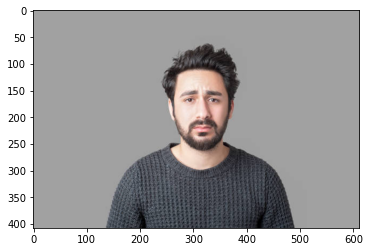

In [50]:
img=cv2.imread('sad.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

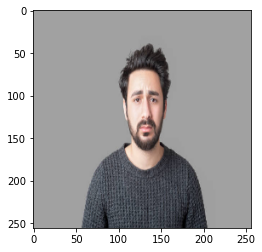

In [51]:
resize = tf.image.resize(img, (256, 256))
resize1=resize.numpy().astype('uint8')
rgb_image = cv2.cvtColor(resize1, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.show()

In [52]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [53]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 101ms/step


In [54]:
yhat

array([[0.00160933]], dtype=float32)

In [55]:
if yhat>0.5:
  print(f'Predicted class is Happy')
else:
  print(f'Predicted class is Sad')

Predicted class is Sad


**4.3 Happy Test**

In [56]:
import cv2

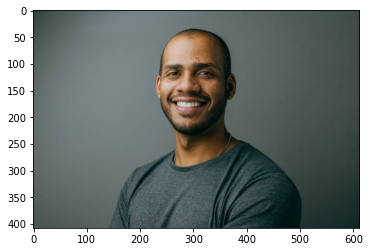

In [57]:
img=cv2.imread('happy.JPG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

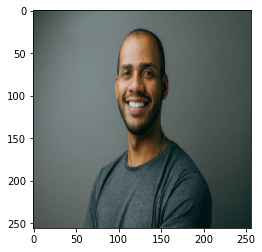

In [58]:
resize = tf.image.resize(img, (256, 256))
resize1=resize.numpy().astype('uint8')
rgb_image = cv2.cvtColor(resize1, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.show()

In [59]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [60]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 388ms/step


In [61]:
yhat

array([[0.89687884]], dtype=float32)

In [62]:
if yhat>0.5:
  print(f'Predicted class is Happy')
else:
  print(f'Predicted class is Sad')

Predicted class is Happy


# **5. Save the Model**

5.1 Save the Model

In [63]:
from tensorflow.keras.models import load_model

In [64]:
model.save(os.path.join('models','happysadmodel.h5'))

c:\Users\akash sen\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
new_model=load_model(os.path.join('models','happysadmodel.h5'))

In [66]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 1s 994ms/step


In [67]:
if yhatnew>0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Sad
